In [ ]:
#Clone ma nguon YOLOV6 ve
%cd /content/drive/MyDrive/yolov6_miai
!git clone https://github.com/meituan/YOLOv6

In [ ]:
#Cai dat thu vien
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
!pip install -r requirements.txt

In [3]:
# Kiem tra viec cai dat
import torch
torch.cuda.is_available()
torch.cuda.get_device_name()

'Tesla T4'

In [ ]:
# Thu nghiem YOLOv6 Pretrain
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
!wget https://github.com/meituan/YOLOv6/releases/download/0.1.0/yolov6s.pt

In [ ]:
# Tai anh tren google ve de thu nghiem nhan dien
%cd /content/drive/MyDrive/yolov6_miai
!mkdir test_images
%cd test_images
!wget https://cdn.theculturetrip.com/wp-content/uploads/2017/11/15271255494_fcc90d3f9b_k.jpg
!wget https://cdnimgen.vietnamplus.vn/t620/uploaded/wbxx/2020_05_13/85896_3585300525545474_a1.jpg
!wget https://media-cdn-v2.laodong.vn/Storage/NewsPortal/2020/4/22/800234/Chay-Pho-Co-9.jpg
!wget https://i-vnexpress.vnecdn.net/2019/03/23/chay-1-3737-1553317413.jpg

In [ ]:
# Thu nhan dien voi pretrain weights
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
!python tools/infer.py --weights /content/drive/MyDrive/yolov6_miai/YOLOv6/yolov6s.pt --source /content/drive/MyDrive/yolov6_miai/test_images/15271255494_fcc90d3f9b_k.jpg

In [ ]:
# Giai nen tep firedata.zip
%cd /content/drive/MyDrive/yolov6_miai
!mkdir train_images
%cd train_images
!unzip ../firedata.zip

In [8]:
# To chuc lai hinh anh va nhan theo dung cau truc YOLOv6
%cd /content/drive/MyDrive/yolov6_miai/train_images
!mkdir images
!mkdir images/train
!mkdir labels
!mkdir labels/train
!mv *.jpg images/train
!mv *.txt labels/train

/content/drive/MyDrive/yolov6_miai/train_images


In [9]:
# Tao Yaml de cho YOLOv6 biet foler train, folder val va so class, tên class
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
!rm data/mydataset.yaml
!echo 'train: ../train_images/images/train' >> data/mydataset.yaml
!echo 'val: ../train_images/images/train' >> data/mydataset.yaml
!echo 'is_coco: False' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['fire']" >> data/mydataset.yaml

/content/drive/MyDrive/yolov6_miai/YOLOv6
rm: cannot remove 'data/mydataset.yaml': No such file or directory


In [12]:
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
!python tools/train.py --batch 32 --conf configs/yolov6s_finetune.py --data data/mydataset.yaml --epochs 5


In [16]:
# Thu nhan dien voi pretrain weights
%cd /content/drive/MyDrive/yolov6_miai/YOLOv6
#!python tools/infer.py --yaml data/mydataset.yaml --weights /content/drive/MyDrive/yolov6_data/YOLOv6/runs/train/exp7/weights/best_ckpt.pt --source /content/drive/MyDrive/yolov6_miai/test_images/Chay-Pho-Co-9.jpg
!python tools/infer.py --yaml data/mydataset.yaml --weights /content/drive/MyDrive/yolov6_data/YOLOv6/runs/train/exp7/weights/best_ckpt.pt --source /content/drive/MyDrive/yolov6_miai/test_images/chay-1-3737-1553317413.jpg

/content/drive/MyDrive/yolov6_miai/YOLOv6
Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='/content/drive/MyDrive/yolov6_miai/test_images/chay-1-3737-1553317413.jpg', view_img=False, weights='/content/drive/MyDrive/yolov6_data/YOLOv6/runs/train/exp7/weights/best_ckpt.pt', yaml='data/mydataset.yaml')
Save directory already existed
Loading checkpoint from /content/drive/MyDrive/yolov6_data/YOLOv6/runs/train/exp7/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 1/1 [

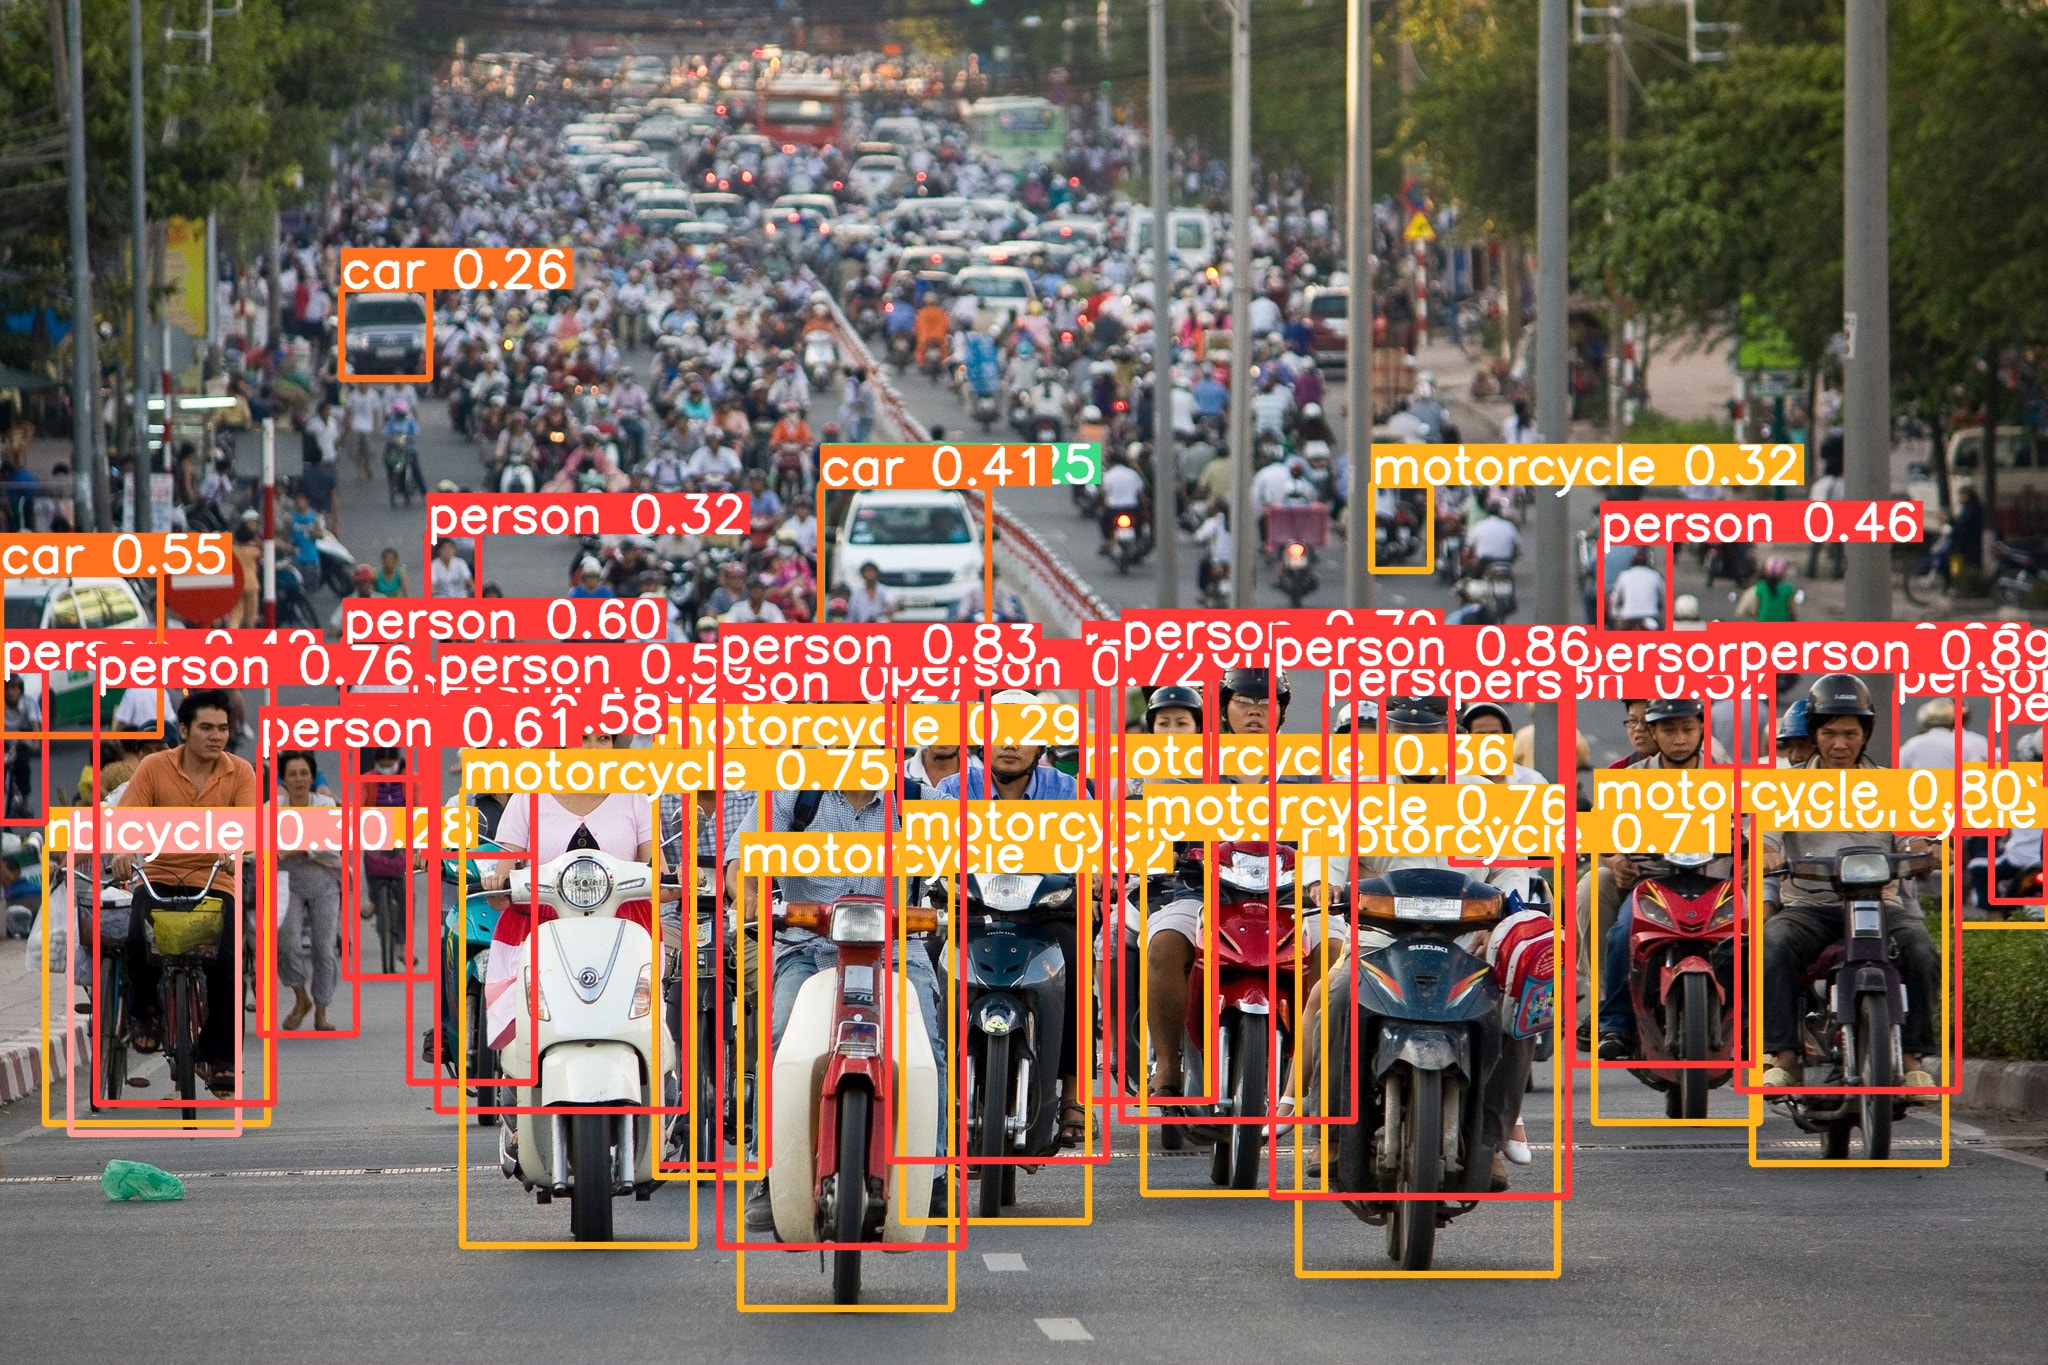

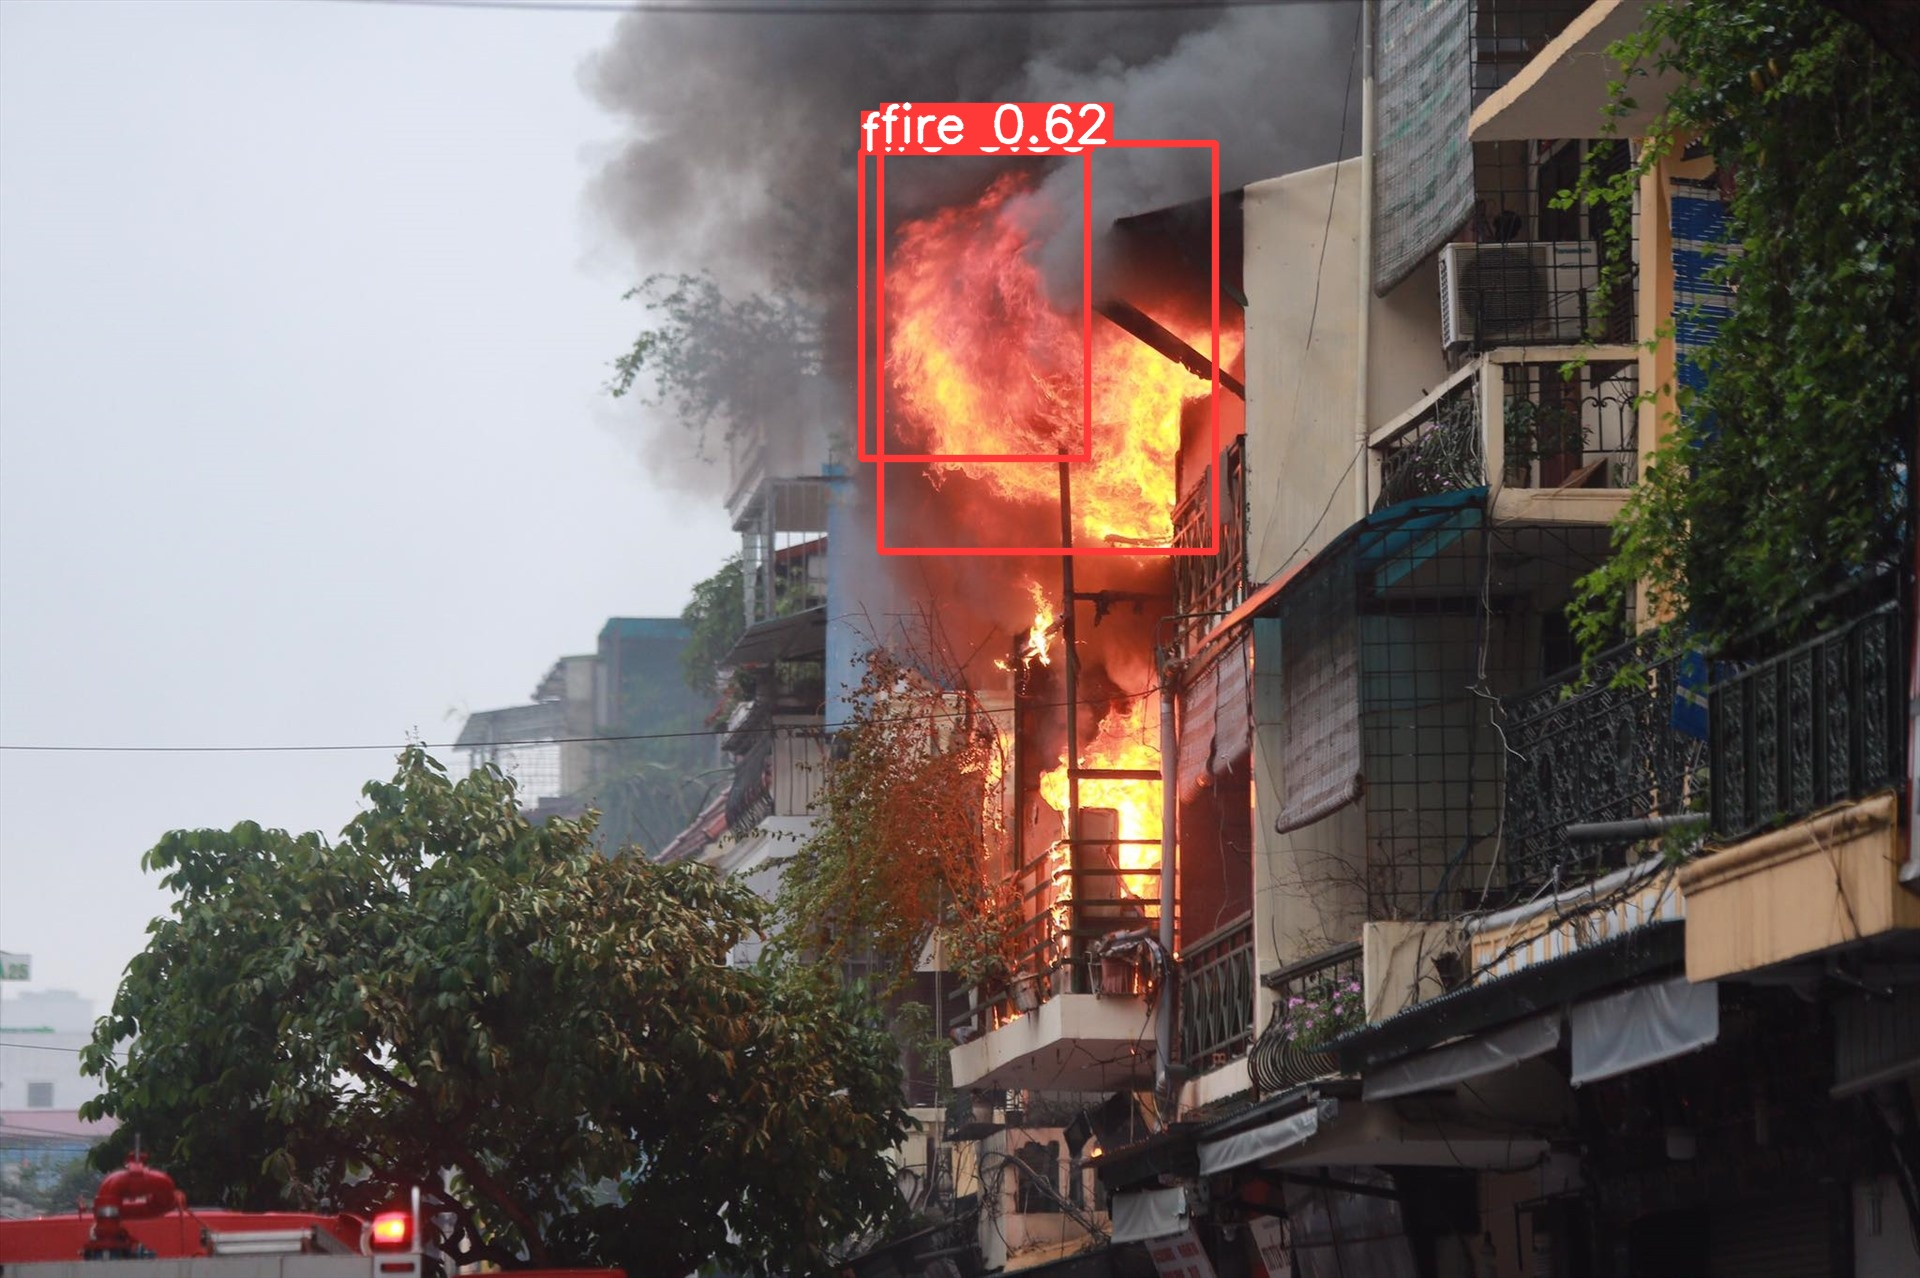

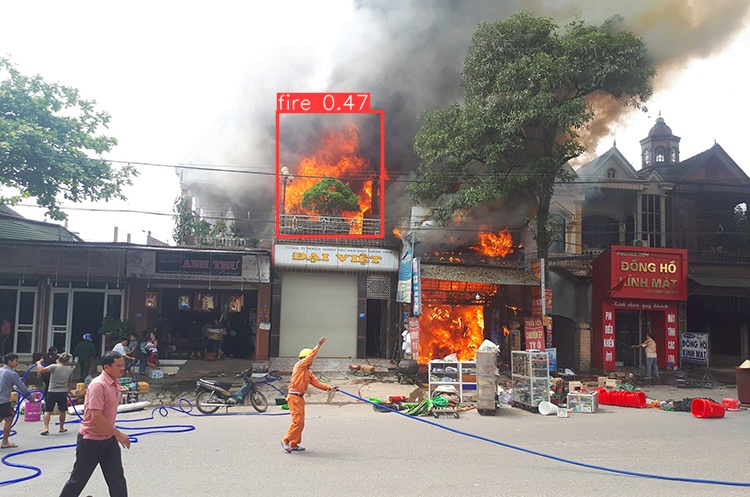

In [17]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1